# How to make a hit song - through data science

### Introduction
Spotify's API contains a wealth of data about tracks, albums, and artists. One particularly useful attribute is called "popularity," which is part of the track objects. This attribute assigns each song a popularity rating on a scale from 0 to 100. We will use this attribute to our advantage and investigate whether songs have higher popularity if they possess certain qualities, such as a specific runtime or whether the size of the album the song is published on matters. To make the results as reliable as possible, have we selected data from almost 10,000 songs (9915 to be exact). However, since this blog post was written shortly after Christmas, an unusually high portion of the songs are Christmas songs. We have tried to minimize the potential side effects of this, but it is still important to keep in mind, as we in this blog post mostly assume that the qualities that make a normal song popular are the same for Christmas songs.

The code used in this post can be find on [Github](https://github.com/LiamC888/SU-MT4007) in the folder "project". All data used in this post have been retrieved from Spotify Web API.  

### Data
Now to the fun part! We retrieved the data from the Spotify API and wrangled it into two dataframes, from which we created the files "tracks.csv" and "albums.csv." We selected the data from these files, but only the columns we are interested in, such as popularity, track and album names, and the runtime of the song. Based on the runtime of each track, we divided the tracks into different groups, and for each group, we calculated the average popularity. The time intervals are customized so that no group has a low enough frequency for one extra good or one extra bad song to significantly affect the average popularity. We can see the results in the bar plot below.

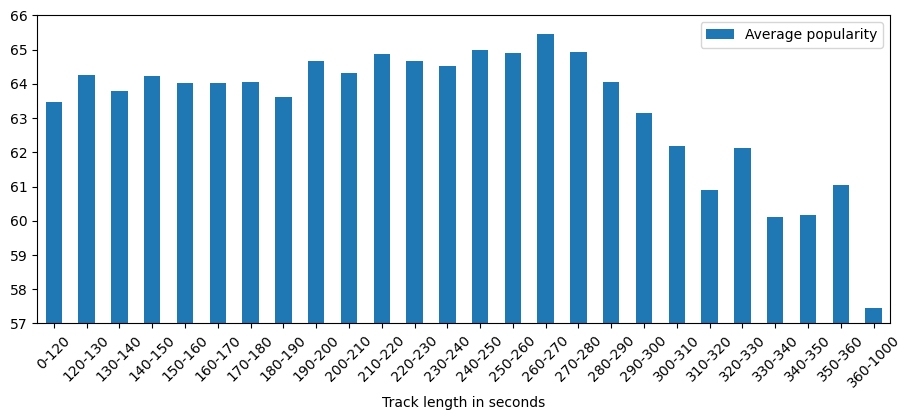

In [13]:
%run 'project_code.ipynb'

df_tracks, df_albums = select_data("tracks.csv", "albums.csv") 

df_time = create_df_time(df_tracks) 

create_bar_plot(df_time)

As we can see, the optimal interval for the length of a song seems to be 190-280 seconds, with 260-270 seconds being the optimal runtime. However, notice that the y-axis is altered, making the differences between the bars appear larger than they actually are. In reality, the differences between the different bars are quite small. Despite this, it seems clear that songs that are 300 seconds or longer perform worse than the average song.

The next quality we will investigate is whether certain words in the title of a song correlate with higher or lower popularity. For simplicity, we will only select songs with English titles, and all numbers and similar elements will also be excluded. We are left with about 4,400 songs. We create the df_word_popularity, which contains all words in the English titles and the average popularity for the songs in which each word appears. We have excluded all words in the wordcloud method's STOPWORDS and also Christmas-related words (ignore the word "bells" in the table below). In the table below, we can see the 20 songs with the highest average popularity and the 20 songs with the lowest average popularity, although we have only included words that appear in at least 10 song titles to minimize the risk of randomly high or low-ranked words. Still, the popularity of words with higher frequency will be more reliable than words with lower frequency.

In [12]:
import pandas as pd

df_english = get_english_tracks(df_tracks) 

df_word_popularity = get_df_word_popularity(df_english)

show_result(df_word_popularity)

,Best words,Best popularity,Best frequency,Worst words,Worst popularity,Worst frequency
0,girls,72,18,morning,56,13
1,wanna,72,11,miss,58,12
2,without,71,17,midnight,59,10
3,name,71,11,soul,59,13
4,next,71,10,turn,59,11
5,wild,71,14,keep,59,11
6,save,71,11,head,60,16
7,please,70,20,wish,60,23
8,rock,70,15,day,60,33
9,call,70,17,every,60,17


The results will, of course, not be completely reliable, but if we focus more on the words with higher frequency, we can hopefully make more general conclusions. For the first part, it seems to be a good idea to include "girls" instead of "boys" in the title since "girls" is the most popular word, while both "boy" and "man" are among the lowest-rated words. We can also see that the popular words contain a lot of active and activity-related words like "crazy", "wild", "life", "dreams", "party", "rock" (as in rock 'n' roll), "wanna", "save", and "go". So, a lot of words that indicate someone wants something to happen or that something is about to happen. On the other hand, the least popular songs have a lot of words with a very static meaning, like "waiting", "keep", "say", "come", and "comes," Except for "wish" and "will", so are none of the words are related to something active.

We will now look at the type of album a song is published in. To do this, we will merge the dataframes of tracks and albums based on the albums_id column in df_tracks and create a new dataframe. We divide the tracks into three different groups based on whether the album is a "single", "album" or "compilation". We calculate the number of songs in each group, as well as the average popularity and average number of songs in each group. We get the scatterplot below, using Python's Plotly Express package, where the size of each ball is based on the number of songs in each group.

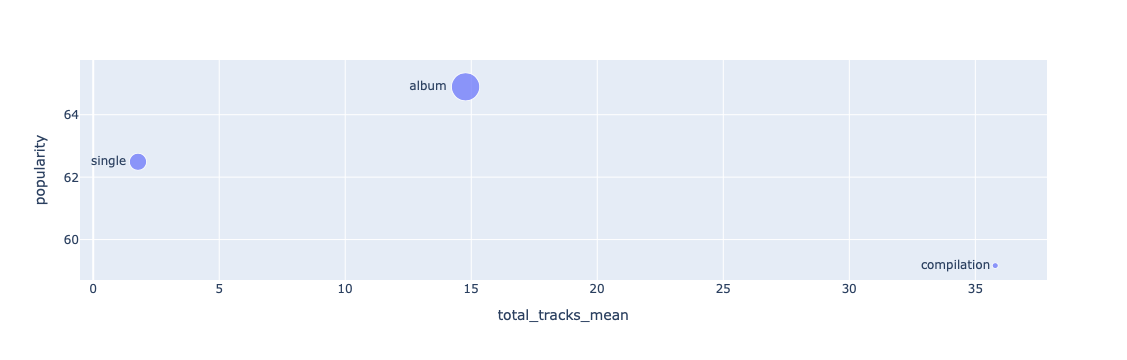

In [60]:
df_album_track = merge_df_album_track(df_tracks, df_albums)

df_album_type = get_album_type_pop(df_album_track)

get_px_scatter(df_album_type)

We can see that songs published in albums seem to be more popular on average, while the opposite seems to be true for songs published in a compilation album. Based on how the plot looks, however, there doesn't seem to be a correlation between the number of tracks in the album the song is published in and the popularity of the song. To investigate this further, we will create a regplot to see if there is any correlation between the number of songs in the album the song is published in and the popularity of the song. Since we don't want the album type to affect the result, and since the number of songs with album type "album" is about 7,000, we will just select songs with album type "album" for this. We can see the result in the regplot below. To make the results of the plot easier to interpret, we will only show the dots for songs with 50 songs or fewer in the album, although the regression line is still based on all values.

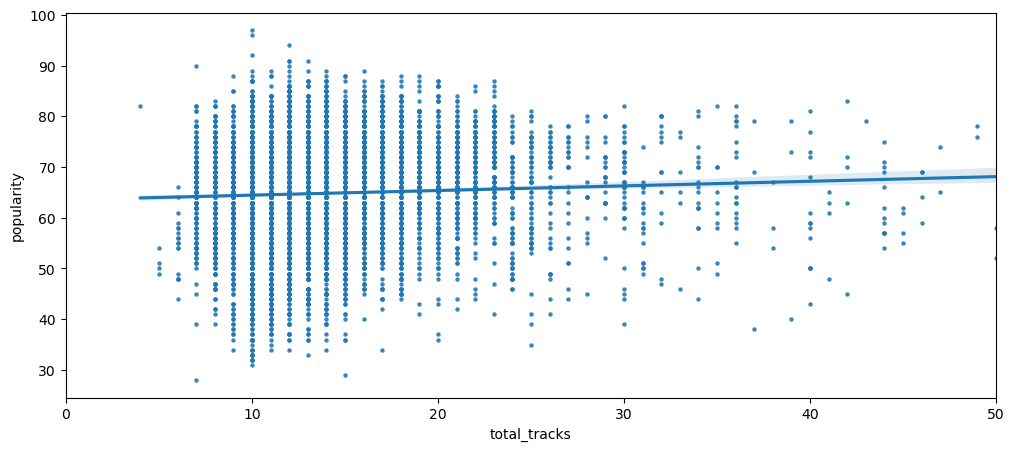

In [61]:
df_album_size = get_album_size_pop(df_album_track)

get_regplot(df_album_size)

There seems to be a positive correlation between the size of the album the song was published in and the popularity of the song. However, the incline of the line is very small, so we can't be too sure whether the correlation is genuine or just random. Since the sample size is very large, and for the sake of this blog post, we will still assume that the correlation exists. If we add a relatively large album size to our recipe for making a hit song, it will, based on the regression plot, still be very unlikely to have a negative effect on popularity.

The next quality we will check is the release year of the song. This is, of course, not something we can really influence unless we find that popularity is positively correlated with the release year (in which case, we could choose to delay releasing the song). However, it is still interesting to investigate. We split the songs into different groups based on the year they were released, with the number of years included in each group customized to ensure that the number of songs in each group is neither too small nor too large. The result can be seen in the bar plot below.

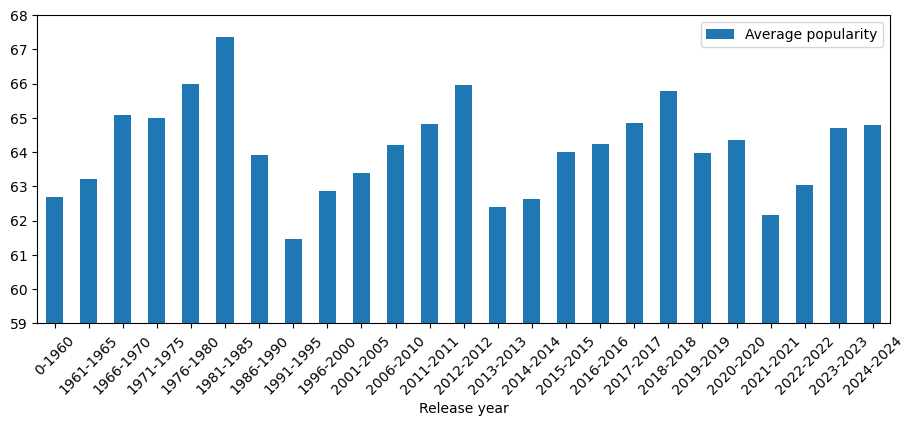

In [62]:
df_album_track = add_release_year(df_album_track)

df_year = get_year_popularity(df_album_track)

get_barplot(df_year)

There seem to be slightly more popular older songs than newer songs, even though songs from the 1990s have very low popularity. However, it is important to note that the variation in popularity is very small, even though the plot makes the variation appear larger than it actually is. While it might be coincidental, the popularity seems to rise and fall in waves over time. Even though the x-axis isn’t proportional over time, this trend remains true if we divide the graph into pre- and post-2010 periods. As mentioned earlier, we can’t do much to change the release date of a song, but there doesn’t seem to be any reason to delay releasing a song, as older songs are somewhat more popular.

For the final quality, we want to investigate whether the number of different artists or bands involved in a song affects its popularity. We divide the songs based on the number of artists or bands credited on the song, grouping together all songs with five or more artists/bands since the number of songs in this category is very low. The result is shown in the scatterplot below, where the size of each ball is based on the number of songs in that group, and we have included a regression line as well.

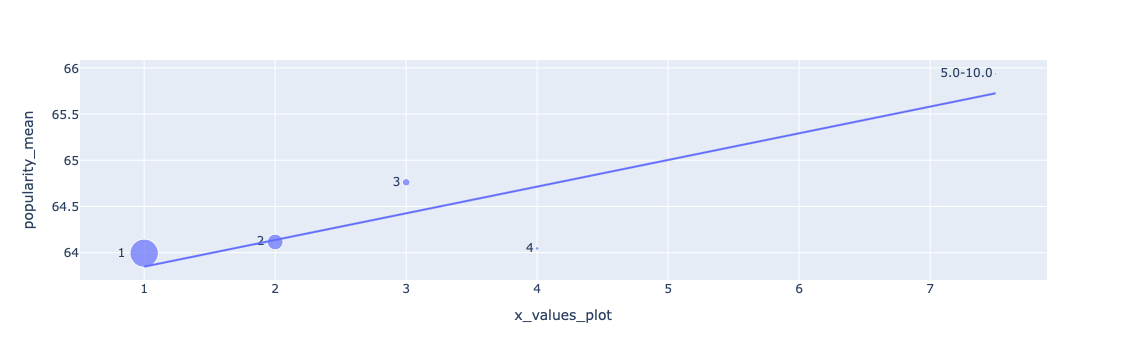

In [63]:
df_song_artists = get_freq_artists_pop(df_tracks)

df_freq_pop = get_freq_pop(df_song_artists)

get_px_scatter_reg(df_freq_pop)

We can see that the number of artists seems to affect popularity in a positive way. However, it could also be the case that more famous artists tend to collaborate more frequently. Either way, it seems logical that collaborating with another artist will introduce the song to a larger audience. For the purposes of this blog post, we will assume that the correlation exists and is not merely due to more famous artists engaging in more collaborations.

So, what is the recipe for making a hit song? Based on the data presented in this blog post, a hit song should ideally be 260–270 seconds long—the closer to this range, the better—and it should definitely not exceed 300 seconds. The song's title should include words that convey action or desire, and it’s better to reference "girls" than "boys" in the title. A hit song should also be part of a fairly large album, and the album type should be a standard "album" rather than a single or compilation. To maximize the chances of creating a hit song, it’s also a good idea to collaborate with as many other artists as possible.

However I think that the most important thing to take away from this blog post is that there really isn't a distinct formula for making a hit song, since music is something subjective. The variety in popularity in the different plots we have seen is in all cases very small, and even though some of the conclusions are true, so could this just depend on trends among larger artists instead of the quality actually having an effect on the popularity. But this isn't a bad thing. A world where everything can be solved by algorithms would be boring. 